<a href="https://www.kaggle.com/code/averyjackson/nflbdb-2024-pass-play-tackle-probability?scriptVersionId=162858124" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nfl-big-data-bowl-2024/players.csv
/kaggle/input/nfl-big-data-bowl-2024/tracking_week_7.csv
/kaggle/input/nfl-big-data-bowl-2024/tracking_week_9.csv
/kaggle/input/nfl-big-data-bowl-2024/tracking_week_6.csv
/kaggle/input/nfl-big-data-bowl-2024/games.csv
/kaggle/input/nfl-big-data-bowl-2024/tracking_week_8.csv
/kaggle/input/nfl-big-data-bowl-2024/tracking_week_4.csv
/kaggle/input/nfl-big-data-bowl-2024/tracking_week_3.csv
/kaggle/input/nfl-big-data-bowl-2024/tackles.csv
/kaggle/input/nfl-big-data-bowl-2024/tracking_week_5.csv
/kaggle/input/nfl-big-data-bowl-2024/tracking_week_1.csv
/kaggle/input/nfl-big-data-bowl-2024/plays.csv
/kaggle/input/nfl-big-data-bowl-2024/tracking_week_2.csv


# Who'll Make the Play?: Analyzing the Likelihood of Successful Tackling On Pass Plays
# #  1. Introduction
The modern NFL offense is home to some of the best strategic minds and greatest athletes in all of sports. Eleven world class athletes move around executing precise plays to march down the field in an attempt to score and to bury their opponent. No play in the repretoir of a modern offense is more dangerous than the pass play. The image of the pass is fresh in the mind of any fan. Jared Goff delivery a throw as Amon-Ra St. Brown eludes the defender covering him. Lamar Jackson heaving the ball to a wide open Zay Flowers for another touchdown against the mighty Miami Dolphins in hopes of cementing their AFC dominance. Or Matthew Stafford delivery the no look pass to Cooper Kupp, that would earn him his first ever Super Bowl win. As NFL Offenses have evolved to live and die by the pass, NFL Defenses are forced to adjust in to keep up. In that evolution we as fans and spectators are left with a simple question. Who is going to make the play and tackle that receiver. 

The goal of this project, was to develop a model that could predict the likelihood that a specific defense player would make the tackle on the recevier who caught the ball. The way that this project approaches solving this problem is by treating it as a categorical classification problem. Specifically if given the appropriate information could we label the likelihood that a defender would be a tackler on a pass play. This approach led to the selection of the ensemble learning algorithm Random Forest and produced favorable results for determining the probability that a defender would be involved in the tackle. 

# # 2. Data Preperation and Feature Selection
The data that was provided for this project was game level tracking data for all players on the field, information of which player made the tackle, and player specific data. When looking through the data the decision was made to select and focus on features that aligned to two specific paths. The first path was ball carrier based information, while the second was defender based information. Using these two prongs of data, allowed for an in model comparison between the physical tracking information of the ball carrier and the physical tracking information of the defenders persuing him. 

The decision was made to focus on just the plays where the ball was caught which was found by filtering the "plays.csv" on the "passResult" column for only the ones that were caught. From there all the other columns besides the "gameId". "playId", "ballCarrierId", and "ballCarrierDisplayName" were kept. That tacking information from weeks one through nine were loaded and filtered based on the "event" column equating to a caught pass. These two segements of data were then merged based on the "gameId", "playId", and "ballCarrierId" to create a tracking system for the ball carrier for every play that I was given access to. 

The second segment of data, the defensive based information was created by combining and filtering several of the supplied CSV's. The "players.csv" was filtered based on the known defensive positions which included "DE", "NT", "SS", "FS", "OLB", "DT", "CB", "ILB", "MLB", and "DB". You will notice that there are more formation or situation specific positions than the layman observer is typically seeing. This will be further commented on in the analysis portion of this report. With the filtered defensive player bunch I was able to combine that with the "tackle.csv" based on the "nflId", "gameId", and "playId". The next step in preparing the data was to combine the previously uploaded tracking data with our combined defensive player data via the "nflId" that was available in both sets. The final series of steps for making this defensive player tracking information useable was to establish a universal category column, or a "tackler?" column. Because the tackle information was given based on the nflId, a lambda function was created that compared the two nflId's that existed in the table. The first nflId is of the defensive player who was being tracked, while the second was the nflId of the player given credit for the tackle. If the ID's matched up or if the assist columns was noted as a "yes" (represented as a 1) then the "tackler?" column was marked to true, if not then it was marked false. Before the final merge all columns were dropped from this defensive player tracking table except for "nflId", "position", "gameId", "displayPlayerName", "frameId", the physical tracking information, and the newly established "tackler?" column. 

The two dataframes from above,ball carrier tracking and defensive player tracking, were combined based on the "gameId", "playId", and "frameId". The "frameId" is needed because the tracking data is based on specific timepoints, thus the tracking information is a function of the time in which they appear. With the combination complete four differential values needed to be created; "Distance Differential", "Speed Differential", "Acceleration Differential" and "Angle of Player Differential". These four are needed because as a defensive player pursues a ball carrier you must take into account both how they are moving and how fast they are moving. That difference will ultimately decide is someone gets in on the tackle. These values were found by finding the Euclidean Distance for the "Distance Differential", which came from the X and Y coordinate positional difference between the ball carrier and the defensive player. The other three were found by calculating the scaler difference between the associated value for both the tackler and ball carrier. 

The final portion of the data preparation came with preparing the data to be used for machine learning. This was done by seperating out the features from the targeted label and then encoding the non-numerical data. The label that we want was "tackler?" so that was split into its own data frame, while the features were silo'd into their own one. The encoding of the values needed to be done for both the labels and the "position" column of the data. All thje encoding work was done by leveraging Scikit-Learn's OneHotEncoder and LabelEncoder packages for the features and labels. 

The final piece of prepatory work was done to normalize the feature data for use. Due to the range of values that all of the different feature components can take we must normalize them so that there is not a bias due to a problem in scale. With the data normalized we are now okay to split the data into testing and training splits for the model to be trainined. 

# # Model Selection and Training
As stated early the model that was selected was a RandomForestClassifier. via Scikit-Learn. The RandomForestClassifier is a well used ensembled learning algorithm that works to use multiple decision trees to get us our desired output. An ensembled learning algorithm is one that uses multiple algorithms working together to produce a result. In this case our RandomForestClassifier is made up of many DecisionTrees that are working to classify if a player is a tackler or not. A Decision Tree Classifier works by asking a series of continuous "yes or no"  questions of the data until it can reasonable guess, similar to the old game "21 Questions". For example it could ask "Is the Distance Differential above or below 15" and then segment the data based on the answer to that question. Each time the data is split that results in the tree gaining a level or depth. The more depth the more precise a tree can get until we reach a point of dimension returns. Below you will find an image of the path a decision tree in the forest would take to arrive at a classification answer. 

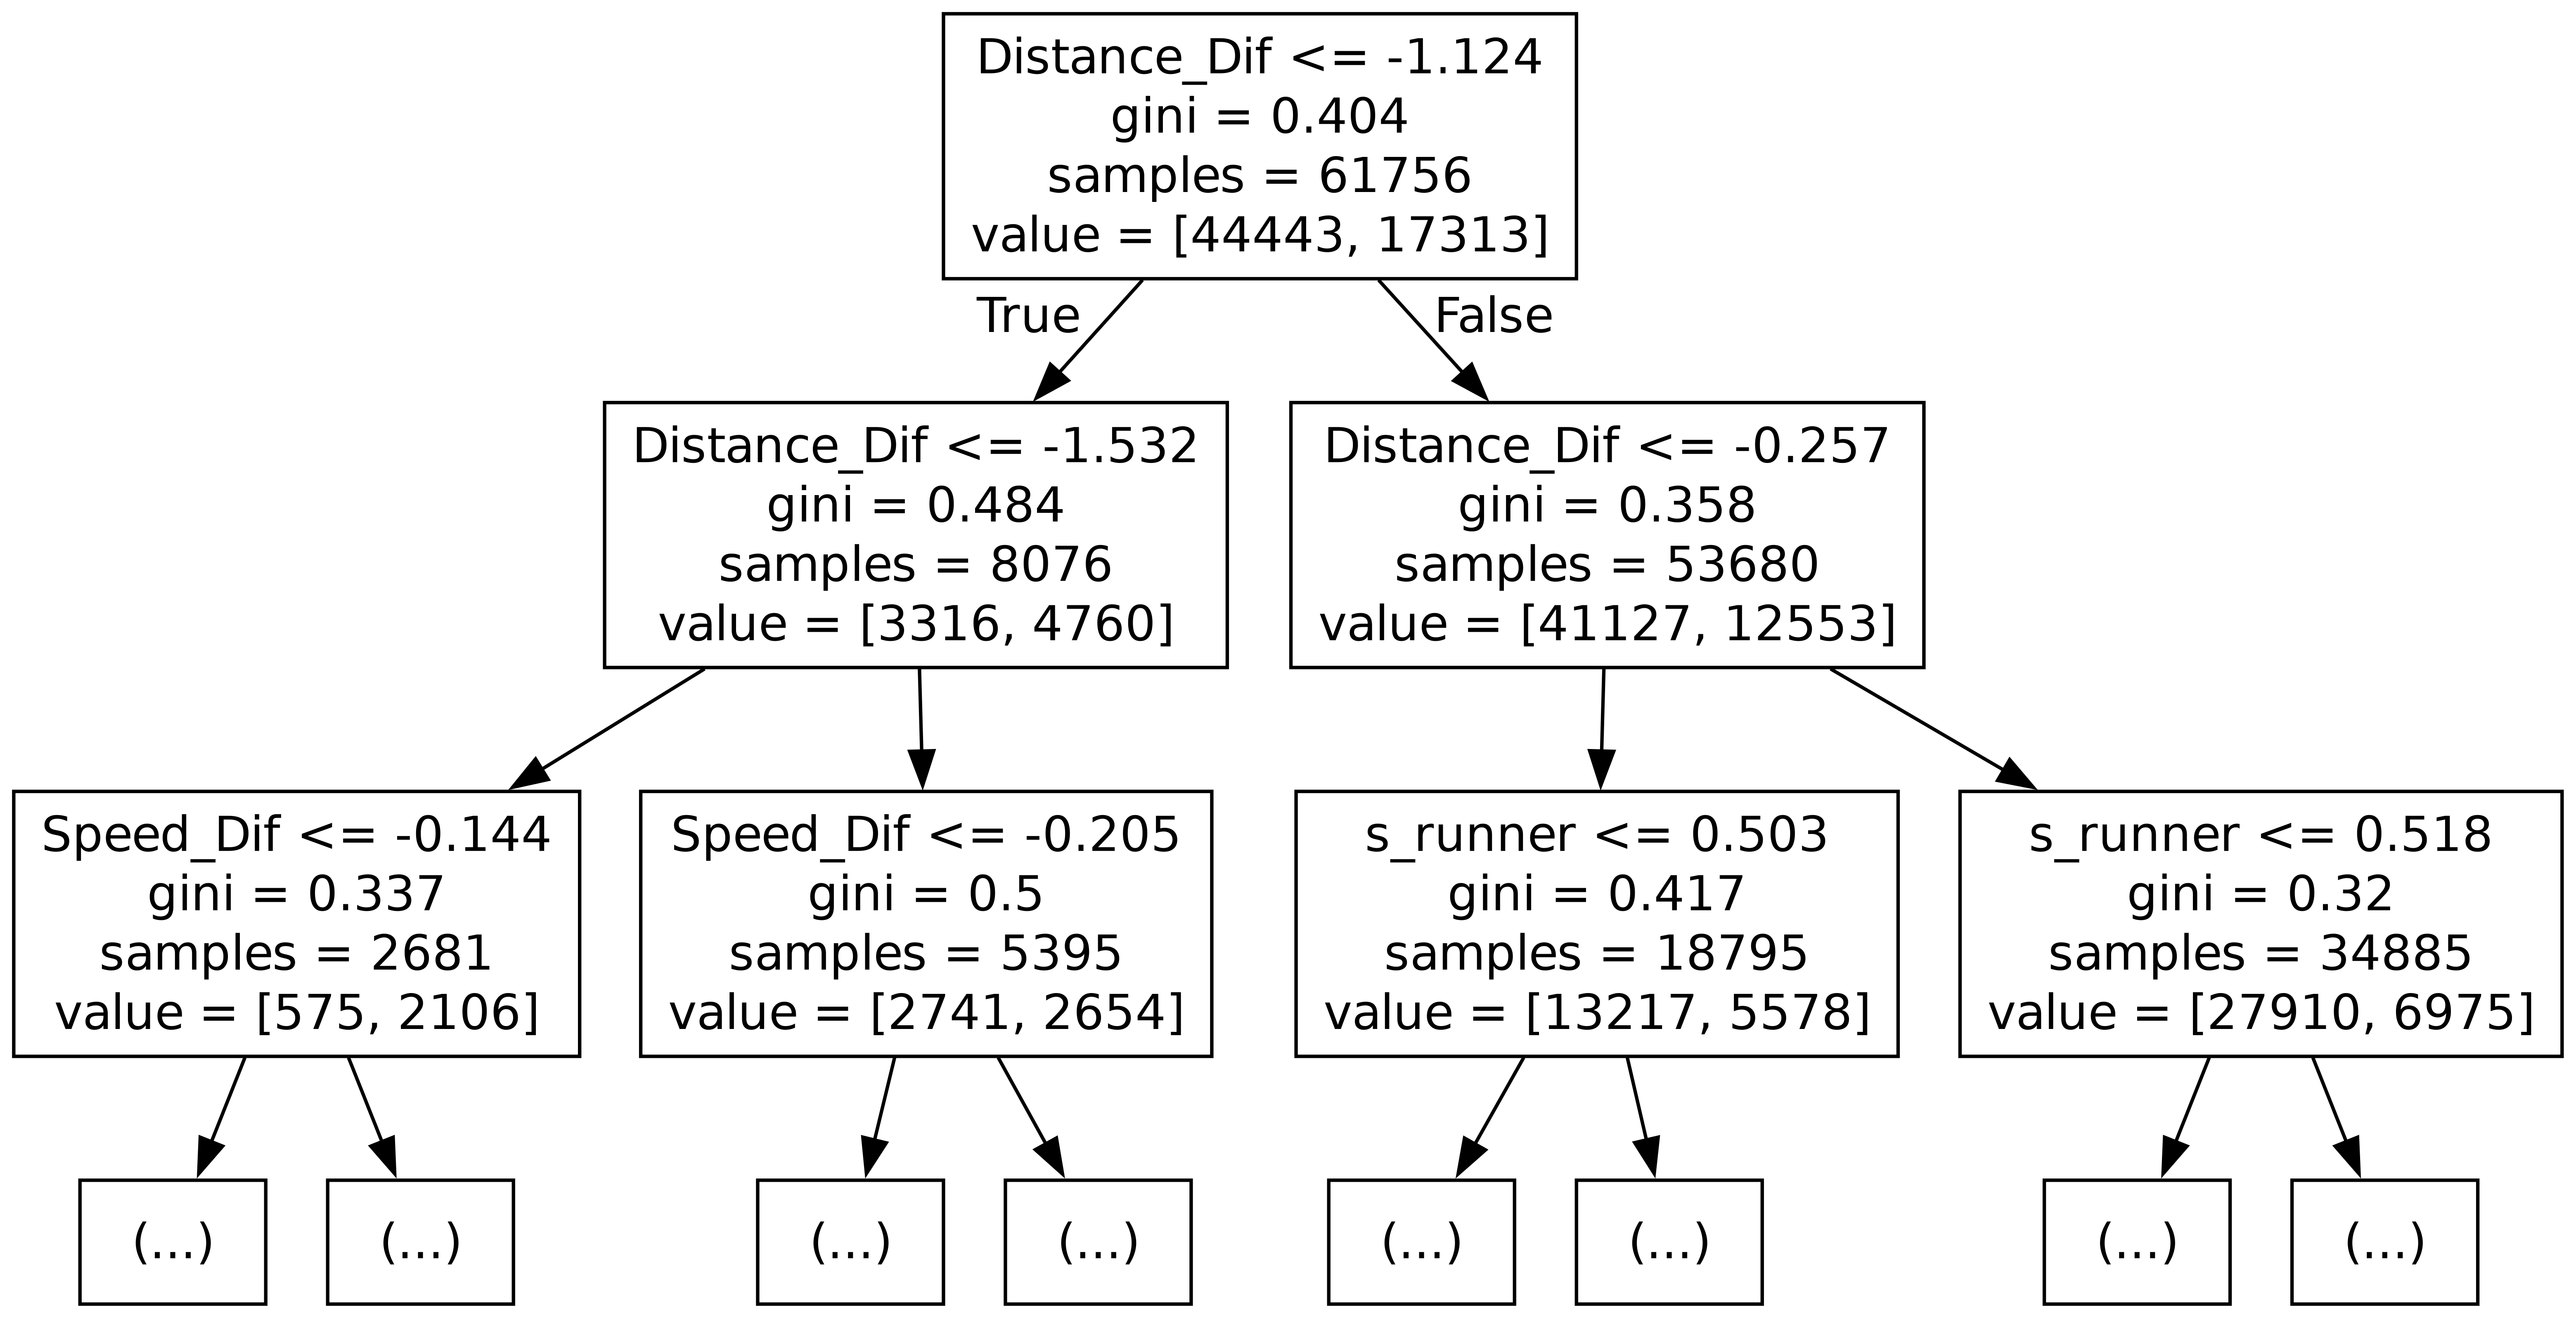

The algorithm also allows us to control the amount of estimators (or tree) that we employ to solve. This decision for amount is dictated after we fit and train our original model. When the model is fitted with our training data we produce an accuracy for classification of **72%**. This accuracy gives us a positive overview that the algorithm selection was a correct one. 

With the original model trained we can now move on to optimizing its performance, via hyperparameter tuning. Scikit-Learn has module known as RandomSearchCV that will allow us to pick a range of estimators and decision tree depth to test to see what is the perfect combination. The hyper parameter tuning was ran and it was discovered that a combination of a maximum depth of 14 and leveraging 157 estimators was optimal. Upon training and fitting the optimized forest we boosted our accuracy to 77%, which is serviceable for our needs. It should be stated here that we were trying to create a program that could output a probability of a defender is the tackler. This is done by leveraging our current code and have it return the position 1 value from the data, due to the data being in an array format. 

# # Results, Analysis, and Discussion
While the end goal was achieved the accuracy of the model could be improved upon a second look at the problem or by taking an expanded approach. When reviewing and analyzing the data two specific points jumped out, the first was the features that impacted the data the most, and the second was the positional group that was most responsible for tackles.

When analyzing the weight of each feature we see that the Distance Differential (feature 14) had an outsized impact on the result followed up by the y position of the runner, and finally the angle of the runner. The output from the code is pictured below to get a visual representation of this information. 

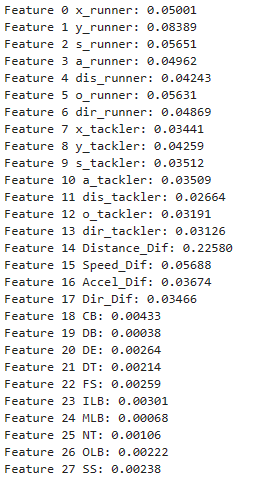

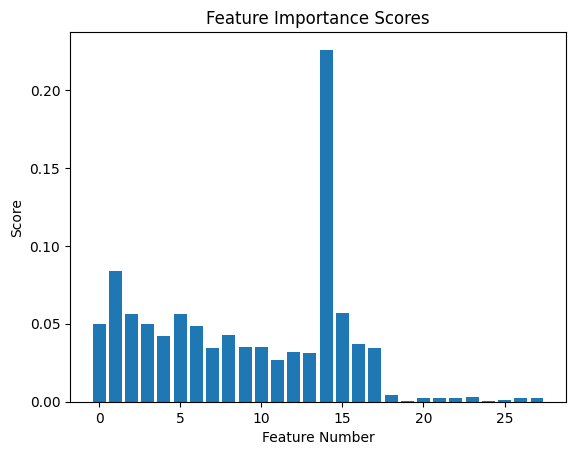

Looking at the resulting figures we now can say with a degree of certainty that positional information regarding the runner is the most important portion versus the data that comes from the defenders primarily. Now this is not to say that the defender information is not equally important, however it is vastly outweighed by the runner specific information. 

The second portion of analysis comes from looking at the players that are makinging the tackles. 

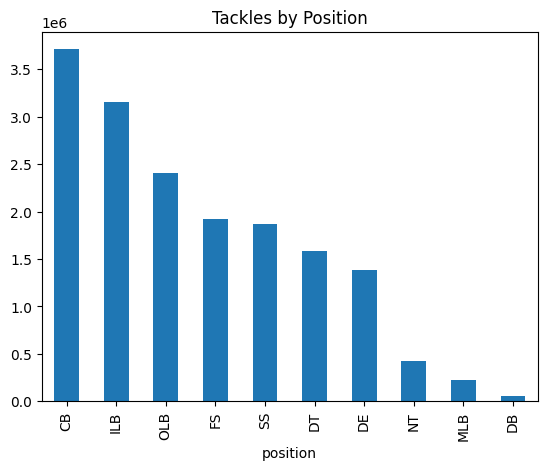

When looking at the bar you see that the most logical position group to lead pass play based tackling are the Cornerbacks, but the second and third ranked positions are were things get interesting. Here we see that Inside Linebackers and Outside Linebackers are the next most positions followed by the Free Safeties and then Strong Safeties. It is here that I'm going to take off my data scientist hat and put on my former player hat to explain why this follows some logical sense, so please bare with me. In football two of the most common defensive fronts that you will see are either a 4 down (typically a 4 - 3 front) or a 3 down (3 - 4 front). The former is used primarily in situations where you expect the run, while the latter is more typical of passing downs. There exist multiple fronts for every specific situation but as a general rule you will see what was described in specific situations. A quick illistration of both is below. 


**4-3 Defense**

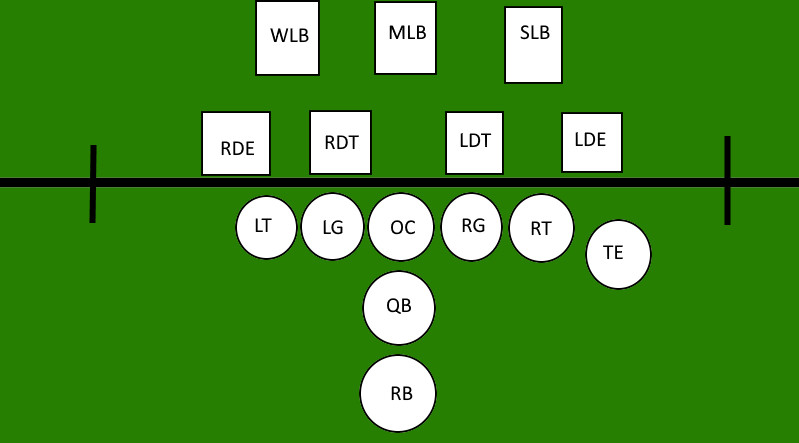


**3-4 Defense**

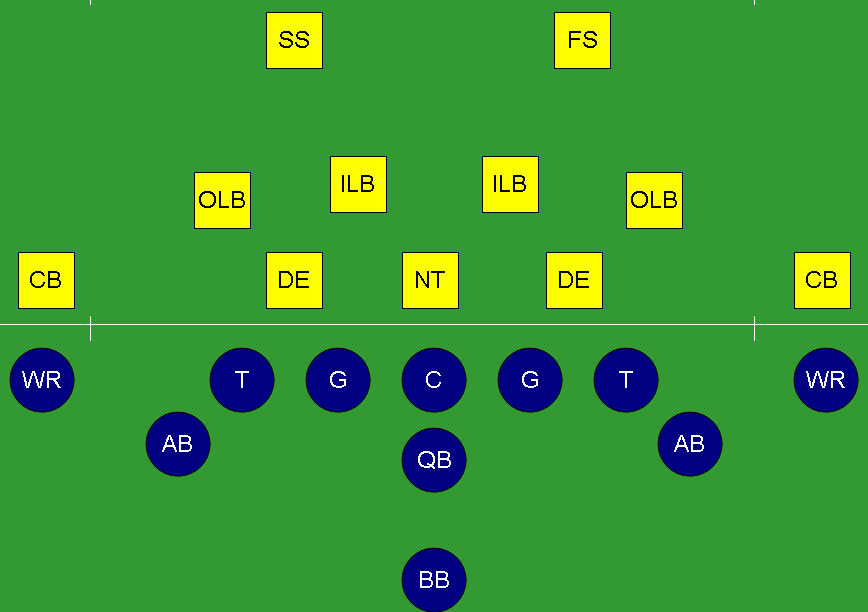

Now the personal associated with each changes, and this is where we see the Inside and Outside Linebackers come into play. At a high level the difference between the 3-4 and 4-3 is simply one of the defensive lineman from the 4-3 is substituted for a linebacker or some other sort of coverage player (a nickelback, safety who plays in the box thus becoming a linebacker, etc). Now with this passing defense in we can assume that the Cornerbacks are doing their main job of covering the Wide Receivers who are the primary target on pass plays, thus this makes us look at the secondary passing recipient options. It is here that we will see Running Backs and Tight Ends get the ball, and those two positions are covered usually by Inside and Outside Linebackers. Additionally, in high percentage passing downs the Free and Strong Safeties can be acting as deterrants based on their on field alignments stopping opposing Quarterbacks from taking high risk deep throws and opting for short to medium throws which are typically defended by the Outside and Inside Linebackers. While the layman may see Linebackers as the run stoppers this data and the probability of them making the tackle on the pass play show that they can also cover

# # Conclusion
The goal of this project was to first and foremost produce a model that could dictate the probability that a player could make a tackle on a pass play. Through the use of the mountains of data that was given I found myself analyxing the game and positions I once played against. It is here with this new metric of tackle probability that we also gained insight into the types of positions making a tackle. The end legacy of this project beyond the code that dictates who makes tackle is the analysis that shows us why a player would make it whether it be their distance to the runner, the position that they play, or the defensive front they find themselves in. 

In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import math

In [3]:
#Loading the play data from the csv
play_data = pd.read_csv('//kaggle//input//nfl-big-data-bowl-2024//plays.csv')
print(len(play_data)) #using the length as a check
play_data.head(5)

12486


,gameId,playId,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,...,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2
0,2022100908,3537,48723,Parker Hesse,(7:52) (Shotgun) M.Mariota pass short middle t...,4,1,10,ATL,TB,...,0.976785,0.023215,-0.006110,0.006110,2.360609,0.981955,NaN,NaN,NaN,NaN
1,2022091103,3126,52457,Chase Claypool,(7:38) (Shotgun) C.Claypool right end to PIT 3...,4,1,10,PIT,CIN,...,0.160485,0.839515,-0.010865,0.010865,1.733344,-0.263424,NaN,NaN,NaN,NaN
2,2022091111,1148,42547,Darren Waller,(8:57) D.Carr pass short middle to D.Waller to...,2,2,5,LV,LAC,...,0.756661,0.243339,-0.037409,0.037409,1.312855,1.133666,NaN,NaN,NaN,NaN
3,2022100212,2007,46461,Mike Boone,(13:12) M.Boone left tackle to DEN 44 for 7 ya...,3,2,10,DEN,LV,...,0.620552,0.379448,-0.002451,0.002451,1.641006,-0.043580,NaN,NaN,NaN,NaN
4,2022091900,1372,47857,Devin Singletary,(8:33) D.Singletary right guard to TEN 32 for ...,2,1,10,BUF,TEN,...,0.836290,0.163710,0.001053,-0.001053,3.686428,-0.167903,NaN,NaN,NaN,NaN


In [4]:
#Filtering all the plays down to only the ones where a pass was caught
play_data_filt = play_data[['gameId', 'playId','playDescription', 'ballCarrierId','ballCarrierDisplayName','passResult']]
play_data_filt = play_data_filt[play_data_filt['passResult']=='C'] #Filtering based on if the pass was caught

print(len(play_data_filt)) 
play_data_filt.head(5)

5634


,gameId,playId,playDescription,ballCarrierId,ballCarrierDisplayName,passResult
0,2022100908,3537,(7:52) (Shotgun) M.Mariota pass short middle t...,48723,Parker Hesse,C
2,2022091111,1148,(8:57) D.Carr pass short middle to D.Waller to...,42547,Darren Waller,C
5,2022103001,2165,(10:14) (Shotgun) M.Mariota pass short left to...,54616,Tyler Allgeier,C
9,2022092511,2903,(:35) (Shotgun) G.Smith pass short left to R.P...,46096,Rashaad Penny,C
12,2022091102,3336,(11:55) (Shotgun) T.Lance pass short middle to...,46331,Ross Dwelley,C


In [5]:
#Filtering down to our needed columns, because we know that the pass result was caught
play_data_filt=play_data_filt[['gameId','playId','ballCarrierId','ballCarrierDisplayName']]
play_data_filt.head(5)

,gameId,playId,ballCarrierId,ballCarrierDisplayName
0,2022100908,3537,48723,Parker Hesse
2,2022091111,1148,42547,Darren Waller
5,2022103001,2165,54616,Tyler Allgeier
9,2022092511,2903,46096,Rashaad Penny
12,2022091102,3336,46331,Ross Dwelley


In [6]:
#Loading our tracking data
week1=pd.read_csv('//kaggle//input//nfl-big-data-bowl-2024//tracking_week_1.csv')
week2=pd.read_csv('//kaggle//input//nfl-big-data-bowl-2024//tracking_week_2.csv')
week3=pd.read_csv('//kaggle//input//nfl-big-data-bowl-2024//tracking_week_3.csv')
week4=pd.read_csv('//kaggle//input//nfl-big-data-bowl-2024//tracking_week_4.csv')
week5=pd.read_csv('//kaggle//input//nfl-big-data-bowl-2024//tracking_week_5.csv')
week6=pd.read_csv('//kaggle//input//nfl-big-data-bowl-2024//tracking_week_6.csv')
week7=pd.read_csv('//kaggle//input//nfl-big-data-bowl-2024//tracking_week_7.csv')
week8=pd.read_csv('//kaggle//input//nfl-big-data-bowl-2024//tracking_week_8.csv')
week9=pd.read_csv('//kaggle//input//nfl-big-data-bowl-2024//tracking_week_9.csv')

#Creating this so we have one central variable to have our data housed in
tracking_data=pd.concat([week1,week2,week3,week4,week5,week6,week7,week8,week9])
tracking_data.head(5)

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
0,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,88.37,27.27,1.62,1.15,0.16,231.74,147.90,NaN
1,2022090800,56,35472.0,Rodger Saffold,2,2022-09-08 20:24:05.299999,76.0,BUF,left,88.47,27.13,1.67,0.61,0.17,230.98,148.53,pass_arrived
2,2022090800,56,35472.0,Rodger Saffold,3,2022-09-08 20:24:05.400000,76.0,BUF,left,88.56,27.01,1.57,0.49,0.15,230.98,147.05,NaN
3,2022090800,56,35472.0,Rodger Saffold,4,2022-09-08 20:24:05.500000,76.0,BUF,left,88.64,26.90,1.44,0.89,0.14,232.38,145.42,NaN
4,2022090800,56,35472.0,Rodger Saffold,5,2022-09-08 20:24:05.599999,76.0,BUF,left,88.72,26.80,1.29,1.24,0.13,233.36,141.95,NaN


In [7]:
tracking_data['event'].unique()
tracking_data = tracking_data[tracking_data['event']=='pass_outcome_caught']
print(len(tracking_data))
tracking_data.head(5)

130087


,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
5,2022090800,56,35472.0,Rodger Saffold,6,2022-09-08 20:24:05.700000,76.0,BUF,left,88.80,26.70,1.15,1.42,0.12,234.48,139.41,pass_outcome_caught
27,2022090800,56,38577.0,Bobby Wagner,6,2022-09-08 20:24:05.700000,45.0,LA,left,78.11,28.74,3.35,2.62,0.32,349.47,357.71,pass_outcome_caught
49,2022090800,56,41239.0,Aaron Donald,6,2022-09-08 20:24:05.700000,99.0,LA,left,92.15,29.96,3.62,2.86,0.37,186.16,157.65,pass_outcome_caught
71,2022090800,56,42392.0,Mitch Morse,6,2022-09-08 20:24:05.700000,60.0,BUF,left,88.21,29.31,1.42,0.64,0.14,282.32,347.15,pass_outcome_caught
93,2022090800,56,42489.0,Stefon Diggs,6,2022-09-08 20:24:05.700000,14.0,BUF,left,79.85,35.59,4.61,4.82,0.45,114.27,202.20,pass_outcome_caught


In [8]:
#This is our ball_carrier movement table. This will be merged with the defender movement table and the tackle table to show 
ball_carrier_movement = play_data_filt.merge(tracking_data, left_on=['gameId','playId','ballCarrierId'], right_on=['gameId','playId', 'nflId'], suffixes=('_play_data','tracking_data'))
print(len(ball_carrier_movement))
ball_carrier_movement.head(5)

5635


,gameId,playId,ballCarrierId,ballCarrierDisplayName,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
0,2022100908,3537,48723,Parker Hesse,48723.0,Parker Hesse,6,2022-10-09 15:43:13.799999,46.0,ATL,left,62.52,28.72,3.30,1.62,0.32,225.64,252.68,pass_outcome_caught
1,2022091111,1148,42547,Darren Waller,42547.0,Darren Waller,6,2022-09-11 17:12:12.900000,83.0,LV,right,51.68,26.42,6.76,0.78,0.68,352.88,28.00,pass_outcome_caught
2,2022103001,2165,54616,Tyler Allgeier,54616.0,Tyler Allgeier,6,2022-10-30 14:51:22.500000,25.0,ATL,right,22.95,35.01,6.69,0.55,0.67,84.54,30.93,pass_outcome_caught
3,2022092511,2903,46096,Rashaad Penny,46096.0,Rashaad Penny,6,2022-09-25 18:38:56.799999,20.0,SEA,left,88.99,9.83,5.39,2.71,0.54,250.02,211.77,pass_outcome_caught
4,2022091102,3336,46331,Ross Dwelley,46331.0,Ross Dwelley,6,2022-09-11 15:32:44.000000,82.0,SF,right,46.24,29.01,2.29,2.78,0.20,200.56,28.01,pass_outcome_caught


In [9]:
#Cleaning up the ball carrier movement table to only have gameId, playId, ballCarrierId, frame, time, physical info
ball_carrier_movement=ball_carrier_movement.drop(['nflId','jerseyNumber','club','playDirection'], axis=1)
ball_carrier_movement.head(5)

,gameId,playId,ballCarrierId,ballCarrierDisplayName,displayName,frameId,time,x,y,s,a,dis,o,dir,event
0,2022100908,3537,48723,Parker Hesse,Parker Hesse,6,2022-10-09 15:43:13.799999,62.52,28.72,3.30,1.62,0.32,225.64,252.68,pass_outcome_caught
1,2022091111,1148,42547,Darren Waller,Darren Waller,6,2022-09-11 17:12:12.900000,51.68,26.42,6.76,0.78,0.68,352.88,28.00,pass_outcome_caught
2,2022103001,2165,54616,Tyler Allgeier,Tyler Allgeier,6,2022-10-30 14:51:22.500000,22.95,35.01,6.69,0.55,0.67,84.54,30.93,pass_outcome_caught
3,2022092511,2903,46096,Rashaad Penny,Rashaad Penny,6,2022-09-25 18:38:56.799999,88.99,9.83,5.39,2.71,0.54,250.02,211.77,pass_outcome_caught
4,2022091102,3336,46331,Ross Dwelley,Ross Dwelley,6,2022-09-11 15:32:44.000000,46.24,29.01,2.29,2.78,0.20,200.56,28.01,pass_outcome_caught


In [10]:
#Start making the defender table here!
#Importing the players sheet so we can get the nflId
players=pd.read_csv('//kaggle//input//nfl-big-data-bowl-2024//players.csv')
players.head()

,nflId,height,weight,birthDate,collegeName,position,displayName
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady
1,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters
2,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers
3,30842,6-6,267,1984-05-19,UCLA,TE,Marcedes Lewis
4,33084,6-4,217,1985-05-17,Boston College,QB,Matt Ryan


In [11]:
#Giving a list of positions to filter on
def_positions = ['DE', 'NT', 'SS', 'FS', 'OLB', 'DT', 'CB', 'ILB', 'MLB', 'DB']
def_players = players[players['position'].isin(def_positions)]
def_players.head(5)

,nflId,height,weight,birthDate,collegeName,position,displayName
8,33131,6-8,300,1986-09-01,Miami,DE,Calais Campbell
14,35449,6-3,304,1987-05-12,California,NT,Tyson Alualu
15,35452,6-2,265,1988-04-03,Michigan,DE,Brandon Graham
16,35454,6-5,275,1989-01-01,South Florida,DE,Jason Pierre-Paul
17,35459,5-10,185,1988-04-10,Alabama,SS,Kareem Jackson


In [12]:
#cleaning up to get a final dataframe to join with the play and tackle table
def_players=def_players.drop(['height','weight','birthDate','collegeName'],axis=1)
print(len(def_players))
def_players.head(5)

861


,nflId,position,displayName
8,33131,DE,Calais Campbell
14,35449,NT,Tyson Alualu
15,35452,DE,Brandon Graham
16,35454,DE,Jason Pierre-Paul
17,35459,SS,Kareem Jackson


In [13]:
#Combining the tackle table (must import) with the defensive player table
#loading the tackle data to use in a defensive player dataframe
tackle=pd.read_csv('//kaggle//input//nfl-big-data-bowl-2024//tackles.csv')
tackle.head(5)

,gameId,playId,nflId,tackle,assist,forcedFumble,pff_missedTackle
0,2022090800,101,42816,1,0,0,0
1,2022090800,393,46232,1,0,0,0
2,2022090800,486,40166,1,0,0,0
3,2022090800,646,47939,1,0,0,0
4,2022090800,818,40107,1,0,0,0


In [14]:
#Creating a defensive player tracking dataframe
defensive_player_tracking = def_players.merge(tracking_data, left_on=['nflId'], right_on=['nflId'])
defensive_player_tracking.head(5)

,nflId,position,displayName_x,gameId,playId,displayName_y,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
0,33131,DE,Calais Campbell,2022091107,868,Calais Campbell,6,2022-09-11 13:42:33.400000,93.0,BAL,left,97.08,34.73,3.84,0.75,0.40,286.66,307.12,pass_outcome_caught
1,33131,DE,Calais Campbell,2022091107,1120,Calais Campbell,6,2022-09-11 13:53:00.500000,93.0,BAL,right,69.42,32.04,1.33,2.14,0.14,160.86,178.42,pass_outcome_caught
2,33131,DE,Calais Campbell,2022091107,1165,Calais Campbell,6,2022-09-11 13:54:22.299999,93.0,BAL,right,75.73,15.61,4.66,2.57,0.48,181.91,172.90,pass_outcome_caught
3,33131,DE,Calais Campbell,2022091107,1738,Calais Campbell,6,2022-09-11 14:21:34.500000,93.0,BAL,right,63.25,29.06,2.06,3.43,0.21,203.52,170.41,pass_outcome_caught
4,33131,DE,Calais Campbell,2022091107,1779,Calais Campbell,6,2022-09-11 14:24:52.099999,93.0,BAL,right,57.80,20.47,3.59,1.90,0.37,38.45,238.01,pass_outcome_caught


In [15]:
#Cleaning the defensive player tracking frame
defensive_player_tracking=defensive_player_tracking.drop(['displayName_x'], axis=1)
defensive_player_tracking.rename(columns={"displayName_y":"displayName_player_data"}, inplace=True)
defensive_player_tracking.head(5)

,nflId,position,gameId,playId,displayName_player_data,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
0,33131,DE,2022091107,868,Calais Campbell,6,2022-09-11 13:42:33.400000,93.0,BAL,left,97.08,34.73,3.84,0.75,0.40,286.66,307.12,pass_outcome_caught
1,33131,DE,2022091107,1120,Calais Campbell,6,2022-09-11 13:53:00.500000,93.0,BAL,right,69.42,32.04,1.33,2.14,0.14,160.86,178.42,pass_outcome_caught
2,33131,DE,2022091107,1165,Calais Campbell,6,2022-09-11 13:54:22.299999,93.0,BAL,right,75.73,15.61,4.66,2.57,0.48,181.91,172.90,pass_outcome_caught
3,33131,DE,2022091107,1738,Calais Campbell,6,2022-09-11 14:21:34.500000,93.0,BAL,right,63.25,29.06,2.06,3.43,0.21,203.52,170.41,pass_outcome_caught
4,33131,DE,2022091107,1779,Calais Campbell,6,2022-09-11 14:24:52.099999,93.0,BAL,right,57.80,20.47,3.59,1.90,0.37,38.45,238.01,pass_outcome_caught


In [16]:
#Merge the defensive_player_tracking with the tackle table only on the game and play ID keep only the tackle and asst columns when done, rename the nflId to tackling player
#put another column if nflId from tackle table == nflId from our tracking table tackle is yes otherwise no

defensive_player_tracking = defensive_player_tracking.drop(['jerseyNumber','time','club','playDirection','event'],axis=1)
defensive_player_tracking.head(5)

,nflId,position,gameId,playId,displayName_player_data,frameId,x,y,s,a,dis,o,dir
0,33131,DE,2022091107,868,Calais Campbell,6,97.08,34.73,3.84,0.75,0.40,286.66,307.12
1,33131,DE,2022091107,1120,Calais Campbell,6,69.42,32.04,1.33,2.14,0.14,160.86,178.42
2,33131,DE,2022091107,1165,Calais Campbell,6,75.73,15.61,4.66,2.57,0.48,181.91,172.90
3,33131,DE,2022091107,1738,Calais Campbell,6,63.25,29.06,2.06,3.43,0.21,203.52,170.41
4,33131,DE,2022091107,1779,Calais Campbell,6,57.80,20.47,3.59,1.90,0.37,38.45,238.01


In [17]:
defensive_player_tracking=defensive_player_tracking.merge(tackle, left_on=['gameId','playId'], right_on=['gameId','playId'])
defensive_player_tracking.head(5)

,nflId_x,position,gameId,playId,displayName_player_data,frameId,x,y,s,a,dis,o,dir,nflId_y,tackle,assist,forcedFumble,pff_missedTackle
0,33131,DE,2022091107,868,Calais Campbell,6,97.08,34.73,3.84,0.75,0.40,286.66,307.12,53460,1,0,0,0
1,33131,DE,2022091107,868,Calais Campbell,6,97.08,34.73,3.84,0.75,0.40,286.66,307.12,33131,0,1,0,0
2,33131,DE,2022091107,868,Calais Campbell,6,97.08,34.73,3.84,0.75,0.40,286.66,307.12,54479,0,0,0,1
3,33131,DE,2022091107,868,Calais Campbell,6,97.08,34.73,3.84,0.75,0.40,286.66,307.12,53533,0,0,0,1
4,37145,OLB,2022091107,868,Justin Houston,6,90.28,22.80,1.54,1.46,0.16,343.57,335.50,53460,1,0,0,0


In [18]:
#Adding a column to see if the defensive player made the tackle (cat)
defensive_player_tracking['tackler?'] = defensive_player_tracking.apply(lambda x: x.nflId_x == x.nflId_y or x.assist==1, axis=1)
defensive_player_tracking.head(5)

,nflId_x,position,gameId,playId,displayName_player_data,frameId,x,y,s,a,dis,o,dir,nflId_y,tackle,assist,forcedFumble,pff_missedTackle,tackler?
0,33131,DE,2022091107,868,Calais Campbell,6,97.08,34.73,3.84,0.75,0.40,286.66,307.12,53460,1,0,0,0,False
1,33131,DE,2022091107,868,Calais Campbell,6,97.08,34.73,3.84,0.75,0.40,286.66,307.12,33131,0,1,0,0,True
2,33131,DE,2022091107,868,Calais Campbell,6,97.08,34.73,3.84,0.75,0.40,286.66,307.12,54479,0,0,0,1,False
3,33131,DE,2022091107,868,Calais Campbell,6,97.08,34.73,3.84,0.75,0.40,286.66,307.12,53533,0,0,0,1,False
4,37145,OLB,2022091107,868,Justin Houston,6,90.28,22.80,1.54,1.46,0.16,343.57,335.50,53460,1,0,0,0,False


In [19]:
def_tackle_tracking=defensive_player_tracking.drop(['nflId_y','tackle','assist','forcedFumble','pff_missedTackle'],axis=1)
def_tackle_tracking.head(5)

,nflId_x,position,gameId,playId,displayName_player_data,frameId,x,y,s,a,dis,o,dir,tackler?
0,33131,DE,2022091107,868,Calais Campbell,6,97.08,34.73,3.84,0.75,0.40,286.66,307.12,False
1,33131,DE,2022091107,868,Calais Campbell,6,97.08,34.73,3.84,0.75,0.40,286.66,307.12,True
2,33131,DE,2022091107,868,Calais Campbell,6,97.08,34.73,3.84,0.75,0.40,286.66,307.12,False
3,33131,DE,2022091107,868,Calais Campbell,6,97.08,34.73,3.84,0.75,0.40,286.66,307.12,False
4,37145,OLB,2022091107,868,Justin Houston,6,90.28,22.80,1.54,1.46,0.16,343.57,335.50,False


In [20]:
#Doing one last cleanup on the ball carrier dataframe so we can unite it with the def tracking on
ball_carrier_tracking=ball_carrier_movement.drop(['event','time'],axis=1)
ball_carrier_tracking.head(5)

,gameId,playId,ballCarrierId,ballCarrierDisplayName,displayName,frameId,x,y,s,a,dis,o,dir
0,2022100908,3537,48723,Parker Hesse,Parker Hesse,6,62.52,28.72,3.30,1.62,0.32,225.64,252.68
1,2022091111,1148,42547,Darren Waller,Darren Waller,6,51.68,26.42,6.76,0.78,0.68,352.88,28.00
2,2022103001,2165,54616,Tyler Allgeier,Tyler Allgeier,6,22.95,35.01,6.69,0.55,0.67,84.54,30.93
3,2022092511,2903,46096,Rashaad Penny,Rashaad Penny,6,88.99,9.83,5.39,2.71,0.54,250.02,211.77
4,2022091102,3336,46331,Ross Dwelley,Ross Dwelley,6,46.24,29.01,2.29,2.78,0.20,200.56,28.01


In [21]:
#Merging the two dataframes
data = ball_carrier_tracking.merge(def_tackle_tracking, left_on=['gameId','playId','frameId'], right_on=['gameId','playId','frameId'],suffixes=('_runner', '_tackler'))
print(len(data))
data.head(10)

77196


,gameId,playId,ballCarrierId,ballCarrierDisplayName,displayName,frameId,x_runner,y_runner,s_runner,a_runner,...,position,displayName_player_data,x_tackler,y_tackler,s_tackler,a_tackler,dis_tackler,o_tackler,dir_tackler,tackler?
0,2022100908,3537,48723,Parker Hesse,Parker Hesse,6,62.52,28.72,3.3,1.62,...,ILB,Lavonte David,61.36,36.68,3.16,5.44,0.30,184.14,245.78,False
1,2022100908,3537,48723,Parker Hesse,Parker Hesse,6,62.52,28.72,3.3,1.62,...,OLB,Shaquil Barrett,71.79,26.15,0.84,0.73,0.07,93.61,29.08,False
2,2022100908,3537,48723,Parker Hesse,Parker Hesse,6,62.52,28.72,3.3,1.62,...,NT,Rakeem Nunez-Roches,66.38,29.13,2.52,1.22,0.27,246.11,296.09,False
3,2022100908,3537,48723,Parker Hesse,Parker Hesse,6,62.52,28.72,3.3,1.62,...,FS,Keanu Neal,56.73,27.44,5.73,1.77,0.57,77.58,75.43,True
4,2022100908,3537,48723,Parker Hesse,Parker Hesse,6,62.52,28.72,3.3,1.62,...,DT,Deadrin Senat,68.46,21.67,3.71,1.85,0.39,292.10,253.44,False
5,2022100908,3537,48723,Parker Hesse,Parker Hesse,6,62.52,28.72,3.3,1.62,...,ILB,Devin White,63.93,20.99,2.48,3.19,0.24,5.33,315.66,False
6,2022100908,3537,48723,Parker Hesse,Parker Hesse,6,62.52,28.72,3.3,1.62,...,CB,Jamel Dean,61.34,4.12,1.60,5.85,0.19,97.20,235.39,False
7,2022100908,3537,48723,Parker Hesse,Parker Hesse,6,62.52,28.72,3.3,1.62,...,FS,Mike Edwards,75.72,26.05,3.89,3.15,0.40,9.61,20.56,False
8,2022100908,3537,48723,Parker Hesse,Parker Hesse,6,62.52,28.72,3.3,1.62,...,FS,Antoine Winfield,75.71,30.99,2.63,3.56,0.25,352.14,322.79,False
9,2022100908,3537,48723,Parker Hesse,Parker Hesse,6,62.52,28.72,3.3,1.62,...,OLB,Joe Tryon,72.93,23.23,1.42,1.78,0.14,107.22,166.01,False


In [22]:
#checking the data columns
data.columns

Index(['gameId', 'playId', 'ballCarrierId', 'ballCarrierDisplayName',
       'displayName', 'frameId', 'x_runner', 'y_runner', 's_runner',
       'a_runner', 'dis_runner', 'o_runner', 'dir_runner', 'nflId_x',
       'position', 'displayName_player_data', 'x_tackler', 'y_tackler',
       's_tackler', 'a_tackler', 'dis_tackler', 'o_tackler', 'dir_tackler',
       'tackler?'],
      dtype='object')

In [23]:
#Adding the differentials for the physical information
data['Distance_Dif'] = data.apply(lambda x: math.dist([x.x_runner,x.y_runner],[x.x_tackler,x.y_tackler]), axis=1)
data.head(5)

,gameId,playId,ballCarrierId,ballCarrierDisplayName,displayName,frameId,x_runner,y_runner,s_runner,a_runner,...,displayName_player_data,x_tackler,y_tackler,s_tackler,a_tackler,dis_tackler,o_tackler,dir_tackler,tackler?,Distance_Dif
0,2022100908,3537,48723,Parker Hesse,Parker Hesse,6,62.52,28.72,3.3,1.62,...,Lavonte David,61.36,36.68,3.16,5.44,0.30,184.14,245.78,False,8.044079
1,2022100908,3537,48723,Parker Hesse,Parker Hesse,6,62.52,28.72,3.3,1.62,...,Shaquil Barrett,71.79,26.15,0.84,0.73,0.07,93.61,29.08,False,9.619657
2,2022100908,3537,48723,Parker Hesse,Parker Hesse,6,62.52,28.72,3.3,1.62,...,Rakeem Nunez-Roches,66.38,29.13,2.52,1.22,0.27,246.11,296.09,False,3.881714
3,2022100908,3537,48723,Parker Hesse,Parker Hesse,6,62.52,28.72,3.3,1.62,...,Keanu Neal,56.73,27.44,5.73,1.77,0.57,77.58,75.43,True,5.929798
4,2022100908,3537,48723,Parker Hesse,Parker Hesse,6,62.52,28.72,3.3,1.62,...,Deadrin Senat,68.46,21.67,3.71,1.85,0.39,292.10,253.44,False,9.218791


In [24]:
#Making the speed difference. Positive means the runner is escaping, negative means tackler is gaining
data['Speed_Dif']=data.apply(lambda x: x.s_runner-x.s_tackler, axis=1)
data.head(5)

,gameId,playId,ballCarrierId,ballCarrierDisplayName,displayName,frameId,x_runner,y_runner,s_runner,a_runner,...,x_tackler,y_tackler,s_tackler,a_tackler,dis_tackler,o_tackler,dir_tackler,tackler?,Distance_Dif,Speed_Dif
0,2022100908,3537,48723,Parker Hesse,Parker Hesse,6,62.52,28.72,3.3,1.62,...,61.36,36.68,3.16,5.44,0.30,184.14,245.78,False,8.044079,0.14
1,2022100908,3537,48723,Parker Hesse,Parker Hesse,6,62.52,28.72,3.3,1.62,...,71.79,26.15,0.84,0.73,0.07,93.61,29.08,False,9.619657,2.46
2,2022100908,3537,48723,Parker Hesse,Parker Hesse,6,62.52,28.72,3.3,1.62,...,66.38,29.13,2.52,1.22,0.27,246.11,296.09,False,3.881714,0.78
3,2022100908,3537,48723,Parker Hesse,Parker Hesse,6,62.52,28.72,3.3,1.62,...,56.73,27.44,5.73,1.77,0.57,77.58,75.43,True,5.929798,-2.43
4,2022100908,3537,48723,Parker Hesse,Parker Hesse,6,62.52,28.72,3.3,1.62,...,68.46,21.67,3.71,1.85,0.39,292.10,253.44,False,9.218791,-0.41


In [25]:
#Finding the acceleration difference
data['Accel_Dif']=data.apply(lambda x: x.a_runner-x.a_tackler, axis=1)
data.head(5)

,gameId,playId,ballCarrierId,ballCarrierDisplayName,displayName,frameId,x_runner,y_runner,s_runner,a_runner,...,y_tackler,s_tackler,a_tackler,dis_tackler,o_tackler,dir_tackler,tackler?,Distance_Dif,Speed_Dif,Accel_Dif
0,2022100908,3537,48723,Parker Hesse,Parker Hesse,6,62.52,28.72,3.3,1.62,...,36.68,3.16,5.44,0.30,184.14,245.78,False,8.044079,0.14,-3.82
1,2022100908,3537,48723,Parker Hesse,Parker Hesse,6,62.52,28.72,3.3,1.62,...,26.15,0.84,0.73,0.07,93.61,29.08,False,9.619657,2.46,0.89
2,2022100908,3537,48723,Parker Hesse,Parker Hesse,6,62.52,28.72,3.3,1.62,...,29.13,2.52,1.22,0.27,246.11,296.09,False,3.881714,0.78,0.40
3,2022100908,3537,48723,Parker Hesse,Parker Hesse,6,62.52,28.72,3.3,1.62,...,27.44,5.73,1.77,0.57,77.58,75.43,True,5.929798,-2.43,-0.15
4,2022100908,3537,48723,Parker Hesse,Parker Hesse,6,62.52,28.72,3.3,1.62,...,21.67,3.71,1.85,0.39,292.10,253.44,False,9.218791,-0.41,-0.23


In [26]:
#Finding the distance between the direction
data['Dir_Dif']=data.apply(lambda x: x.dir_runner-x.dir_tackler, axis=1)
data.head(5)

,gameId,playId,ballCarrierId,ballCarrierDisplayName,displayName,frameId,x_runner,y_runner,s_runner,a_runner,...,s_tackler,a_tackler,dis_tackler,o_tackler,dir_tackler,tackler?,Distance_Dif,Speed_Dif,Accel_Dif,Dir_Dif
0,2022100908,3537,48723,Parker Hesse,Parker Hesse,6,62.52,28.72,3.3,1.62,...,3.16,5.44,0.30,184.14,245.78,False,8.044079,0.14,-3.82,6.90
1,2022100908,3537,48723,Parker Hesse,Parker Hesse,6,62.52,28.72,3.3,1.62,...,0.84,0.73,0.07,93.61,29.08,False,9.619657,2.46,0.89,223.60
2,2022100908,3537,48723,Parker Hesse,Parker Hesse,6,62.52,28.72,3.3,1.62,...,2.52,1.22,0.27,246.11,296.09,False,3.881714,0.78,0.40,-43.41
3,2022100908,3537,48723,Parker Hesse,Parker Hesse,6,62.52,28.72,3.3,1.62,...,5.73,1.77,0.57,77.58,75.43,True,5.929798,-2.43,-0.15,177.25
4,2022100908,3537,48723,Parker Hesse,Parker Hesse,6,62.52,28.72,3.3,1.62,...,3.71,1.85,0.39,292.10,253.44,False,9.218791,-0.41,-0.23,-0.76


In [27]:
#Checking our columns to ensure the new ones are in there
data.columns

Index(['gameId', 'playId', 'ballCarrierId', 'ballCarrierDisplayName',
       'displayName', 'frameId', 'x_runner', 'y_runner', 's_runner',
       'a_runner', 'dis_runner', 'o_runner', 'dir_runner', 'nflId_x',
       'position', 'displayName_player_data', 'x_tackler', 'y_tackler',
       's_tackler', 'a_tackler', 'dis_tackler', 'o_tackler', 'dir_tackler',
       'tackler?', 'Distance_Dif', 'Speed_Dif', 'Accel_Dif', 'Dir_Dif'],
      dtype='object')

In [28]:
#Making a copy of the data frame so we can always go back to the original data aggregation
workable_data = data.copy(deep=True)
workable_data.head(5)

,gameId,playId,ballCarrierId,ballCarrierDisplayName,displayName,frameId,x_runner,y_runner,s_runner,a_runner,...,s_tackler,a_tackler,dis_tackler,o_tackler,dir_tackler,tackler?,Distance_Dif,Speed_Dif,Accel_Dif,Dir_Dif
0,2022100908,3537,48723,Parker Hesse,Parker Hesse,6,62.52,28.72,3.3,1.62,...,3.16,5.44,0.30,184.14,245.78,False,8.044079,0.14,-3.82,6.90
1,2022100908,3537,48723,Parker Hesse,Parker Hesse,6,62.52,28.72,3.3,1.62,...,0.84,0.73,0.07,93.61,29.08,False,9.619657,2.46,0.89,223.60
2,2022100908,3537,48723,Parker Hesse,Parker Hesse,6,62.52,28.72,3.3,1.62,...,2.52,1.22,0.27,246.11,296.09,False,3.881714,0.78,0.40,-43.41
3,2022100908,3537,48723,Parker Hesse,Parker Hesse,6,62.52,28.72,3.3,1.62,...,5.73,1.77,0.57,77.58,75.43,True,5.929798,-2.43,-0.15,177.25
4,2022100908,3537,48723,Parker Hesse,Parker Hesse,6,62.52,28.72,3.3,1.62,...,3.71,1.85,0.39,292.10,253.44,False,9.218791,-0.41,-0.23,-0.76


In [29]:
#grabbing the columns we need for the data science portion...NEED THE TACKLER COLUMNS IN HERE
working_data = workable_data[['x_runner', 'y_runner', 's_runner', 'a_runner', 'dis_runner', 'o_runner', 'dir_runner', 'x_tackler', 'y_tackler','s_tackler', 'a_tackler', 'dis_tackler', 'o_tackler', 'dir_tackler', 'Distance_Dif', 'Speed_Dif', 'Accel_Dif', 'Dir_Dif','position','tackler?']]
working_data.head(5)

,x_runner,y_runner,s_runner,a_runner,dis_runner,o_runner,dir_runner,x_tackler,y_tackler,s_tackler,a_tackler,dis_tackler,o_tackler,dir_tackler,Distance_Dif,Speed_Dif,Accel_Dif,Dir_Dif,position,tackler?
0,62.52,28.72,3.3,1.62,0.32,225.64,252.68,61.36,36.68,3.16,5.44,0.30,184.14,245.78,8.044079,0.14,-3.82,6.90,ILB,False
1,62.52,28.72,3.3,1.62,0.32,225.64,252.68,71.79,26.15,0.84,0.73,0.07,93.61,29.08,9.619657,2.46,0.89,223.60,OLB,False
2,62.52,28.72,3.3,1.62,0.32,225.64,252.68,66.38,29.13,2.52,1.22,0.27,246.11,296.09,3.881714,0.78,0.40,-43.41,NT,False
3,62.52,28.72,3.3,1.62,0.32,225.64,252.68,56.73,27.44,5.73,1.77,0.57,77.58,75.43,5.929798,-2.43,-0.15,177.25,FS,True
4,62.52,28.72,3.3,1.62,0.32,225.64,252.68,68.46,21.67,3.71,1.85,0.39,292.10,253.44,9.218791,-0.41,-0.23,-0.76,DT,False


In [30]:
#Importing the packages we will need for data science work
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


In [31]:
#Creating the feature breakdown
feats = working_data.iloc[:, :-1]
feats.head(3)

,x_runner,y_runner,s_runner,a_runner,dis_runner,o_runner,dir_runner,x_tackler,y_tackler,s_tackler,a_tackler,dis_tackler,o_tackler,dir_tackler,Distance_Dif,Speed_Dif,Accel_Dif,Dir_Dif,position
0,62.52,28.72,3.3,1.62,0.32,225.64,252.68,61.36,36.68,3.16,5.44,0.30,184.14,245.78,8.044079,0.14,-3.82,6.90,ILB
1,62.52,28.72,3.3,1.62,0.32,225.64,252.68,71.79,26.15,0.84,0.73,0.07,93.61,29.08,9.619657,2.46,0.89,223.60,OLB
2,62.52,28.72,3.3,1.62,0.32,225.64,252.68,66.38,29.13,2.52,1.22,0.27,246.11,296.09,3.881714,0.78,0.40,-43.41,NT


In [32]:
#We need to use one hot encoding on the position column so it can be properly normalized
enc = OneHotEncoder()
one_hot = pd.get_dummies(feats['position'])
feats = feats.join(one_hot)
feats=feats.drop(['position'], axis=1)
feats.head(5)

,x_runner,y_runner,s_runner,a_runner,dis_runner,o_runner,dir_runner,x_tackler,y_tackler,s_tackler,...,CB,DB,DE,DT,FS,ILB,MLB,NT,OLB,SS
0,62.52,28.72,3.3,1.62,0.32,225.64,252.68,61.36,36.68,3.16,...,False,False,False,False,False,True,False,False,False,False
1,62.52,28.72,3.3,1.62,0.32,225.64,252.68,71.79,26.15,0.84,...,False,False,False,False,False,False,False,False,True,False
2,62.52,28.72,3.3,1.62,0.32,225.64,252.68,66.38,29.13,2.52,...,False,False,False,False,False,False,False,True,False,False
3,62.52,28.72,3.3,1.62,0.32,225.64,252.68,56.73,27.44,5.73,...,False,False,False,False,True,False,False,False,False,False
4,62.52,28.72,3.3,1.62,0.32,225.64,252.68,68.46,21.67,3.71,...,False,False,False,True,False,False,False,False,False,False


In [33]:
#creating the labels
labels = working_data.iloc[:, -1:]
labels.head(3)

,tackler?
0,False
1,False
2,False


In [34]:
#encoding the labels for use in the code via Label Encoder
le = LabelEncoder()
le.fit(labels)
le.fit_transform(labels)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, ..., 1, 0, 1])

In [35]:
#Setting the targets to be the encoded values
targets = le.fit_transform(labels)
targets = pd.DataFrame(targets)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
#Splitting the data into testing and training groups and labels
X_train, X_test, y_train, y_test = train_test_split(feats, targets, test_size=0.20, random_state=0)

#We have to normalize the position data, but one hot encode it because it is textual
#Normalizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
#Using random forest as the classifier to get the predict proba
from sklearn.ensemble import RandomForestClassifier

In [38]:
clf2 = RandomForestClassifier(max_depth=2, random_state=0)
clf2.fit(X_train, y_train)

/tmp/ipykernel_19/3120973234.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf2.fit(X_train, y_train)


RandomForestClassifier(max_depth=2, random_state=0)

In [39]:
#Seeing our baseline for the random forest model
y_pred = clf2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.5f" % accuracy)

Accuracy: 0.72066


In [40]:
param_dist = {'n_estimators': randint(50,250),'max_depth': randint(1,20)}

rf = RandomForestClassifier()

forest_opt = RandomizedSearchCV(rf,param_distributions = param_dist, n_iter=5, cv=5)

forest_opt.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x786d36766470>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x786d367648b0>})

In [41]:
#Finding the best forest for us to use
best_forest = forest_opt.best_estimator_

print('Optimized Combo: ', forest_opt.best_params_)

Optimized Combo:  {'max_depth': 17, 'n_estimators': 153}


In [42]:
best_forest.fit(X_train, y_train)

#Seeing our baseline for the random forest model
y_pred = best_forest.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.5f" % accuracy)

/tmp/ipykernel_19/1461911692.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_forest.fit(X_train, y_train)


Accuracy: 0.78964


In [43]:
#Having our new algorithm predict the probabilities of each
best_forest.predict_proba(X_test)

array([[0.85805434, 0.14194566],
       [0.52414844, 0.47585156],
       [0.64809391, 0.35190609],
       ...,
       [0.83869666, 0.16130334],
       [0.71428774, 0.28571226],
       [0.64108446, 0.35891554]])

In [44]:
feat_importance = best_forest.feature_importances_
q = 0
feat_names ={}
for x in list(feats.columns):
    feat_names.update({q:x})
    q+=1
for i,v in enumerate(feat_importance):
    print(f'Feature %0d {feat_names[i]}: %.5f' % (i,v))
    #print('Feature: %0d, Score: %.5f' % (i,v))

Feature 0 x_runner: 0.05355
Feature 1 y_runner: 0.08020
Feature 2 s_runner: 0.05762
Feature 3 a_runner: 0.05412
Feature 4 dis_runner: 0.04286
Feature 5 o_runner: 0.06044
Feature 6 dir_runner: 0.05322
Feature 7 x_tackler: 0.03908
Feature 8 y_tackler: 0.04386
Feature 9 s_tackler: 0.03737
Feature 10 a_tackler: 0.03824
Feature 11 dis_tackler: 0.03061
Feature 12 o_tackler: 0.03753
Feature 13 dir_tackler: 0.03563
Feature 14 Distance_Dif: 0.18088
Feature 15 Speed_Dif: 0.05089
Feature 16 Accel_Dif: 0.04018
Feature 17 Dir_Dif: 0.03958
Feature 18 CB: 0.00419
Feature 19 DB: 0.00036
Feature 20 DE: 0.00291
Feature 21 DT: 0.00220
Feature 22 FS: 0.00320
Feature 23 ILB: 0.00342
Feature 24 MLB: 0.00086
Feature 25 NT: 0.00115
Feature 26 OLB: 0.00292
Feature 27 SS: 0.00294


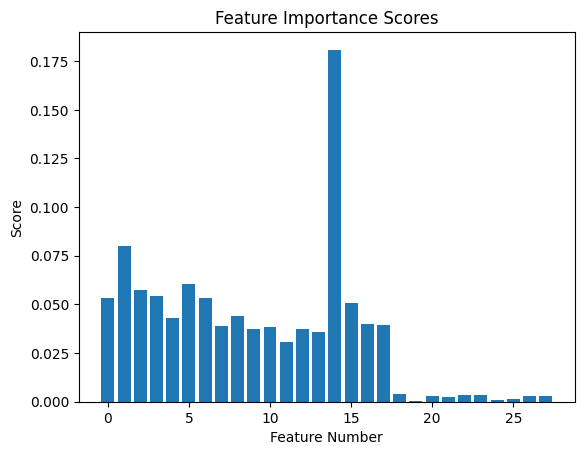

In [45]:
import matplotlib.pyplot as plt
#Chart 1 for feature importances
plt.bar([x for x in range(len(feat_importance))], feat_importance, label= "Feature Importance Scores")
plt.title("Feature Importance Scores")
plt.xlabel("Feature Number")
plt.ylabel("Score")
plt.show()

In [46]:
#Doing quick data analysis
feats_eda = feats.loc[:, "x_runner":"Dir_Dif"]
feats_eda.head(3)

,x_runner,y_runner,s_runner,a_runner,dis_runner,o_runner,dir_runner,x_tackler,y_tackler,s_tackler,a_tackler,dis_tackler,o_tackler,dir_tackler,Distance_Dif,Speed_Dif,Accel_Dif,Dir_Dif
0,62.52,28.72,3.3,1.62,0.32,225.64,252.68,61.36,36.68,3.16,5.44,0.30,184.14,245.78,8.044079,0.14,-3.82,6.90
1,62.52,28.72,3.3,1.62,0.32,225.64,252.68,71.79,26.15,0.84,0.73,0.07,93.61,29.08,9.619657,2.46,0.89,223.60
2,62.52,28.72,3.3,1.62,0.32,225.64,252.68,66.38,29.13,2.52,1.22,0.27,246.11,296.09,3.881714,0.78,0.40,-43.41


In [47]:
#Finding the mean of our feats
feats_eda.apply(np.mean)

x_runner         60.224369
y_runner         27.057494
s_runner          4.508680
a_runner          2.476723
dis_runner        0.453060
o_runner        181.132667
dir_runner      178.789879
x_tackler        60.160652
y_tackler        26.870938
s_tackler         3.796268
a_tackler         2.560019
dis_tackler       0.380576
o_tackler       179.391206
dir_tackler     181.039548
Distance_Dif     16.738592
Speed_Dif         0.712411
Accel_Dif        -0.083296
Dir_Dif          -2.249669
dtype: float64

In [48]:
#Finding the standard deviation of our feats
feats_eda.apply(np.std)

x_runner         22.074074
y_runner         14.118953
s_runner          2.058707
a_runner          1.313353
dis_runner        0.208256
o_runner        106.755285
dir_runner      111.447049
x_tackler        23.294563
y_tackler         9.966145
s_tackler         1.873037
a_tackler         1.366767
dis_tackler       0.187602
o_tackler       107.276285
dir_tackler     107.574598
Distance_Dif      9.270984
Speed_Dif         2.611516
Accel_Dif         1.882290
Dir_Dif         144.780579
dtype: float64

In [49]:
#Checking the positions that had the most outsized tackling effort
tacklers = def_players.merge(tackle, left_on = 'nflId', right_on='nflId')
tacklers = tacklers.merge(tracking_data, left_on = 'gameId', right_on = 'gameId')
tacklers.head(5)

,nflId_x,position,displayName_x,gameId,playId_x,tackle,assist,forcedFumble,pff_missedTackle,playId_y,...,club,playDirection,x,y,s,a,dis,o,dir,event
0,33131,DE,Calais Campbell,2022091107,1803,1,0,0,0,202,...,BAL,right,35.25,32.12,1.93,1.11,0.20,126.03,169.51,pass_outcome_caught
1,33131,DE,Calais Campbell,2022091107,1803,1,0,0,0,202,...,NYJ,right,40.13,20.95,8.02,3.08,0.80,189.36,182.83,pass_outcome_caught
2,33131,DE,Calais Campbell,2022091107,1803,1,0,0,0,202,...,BAL,right,34.90,42.52,1.05,2.25,0.10,168.23,81.84,pass_outcome_caught
3,33131,DE,Calais Campbell,2022091107,1803,1,0,0,0,202,...,NYJ,right,57.42,18.76,7.49,3.89,0.74,225.76,192.76,pass_outcome_caught
4,33131,DE,Calais Campbell,2022091107,1803,1,0,0,0,202,...,BAL,right,35.98,31.90,1.36,1.04,0.14,160.89,199.80,pass_outcome_caught


<Axes: title={'center': 'Tackles by Position'}, xlabel='position'>

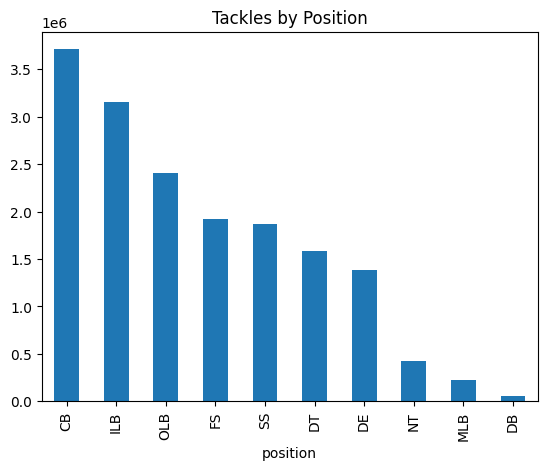

In [50]:
tacklers['position'].value_counts().plot(kind='bar', title = 'Tackles by Position')

In [51]:
from sklearn.tree import export_graphviz
tree = best_forest.estimator_
tree.fit(X_train, y_train)
#The actual depth is 14, but 2 allows for a readable picture
export_graphviz(tree, max_depth=2, feature_names=feats.columns ,out_file="BestForest.dot")

In [52]:
from subprocess import call
call(['dot', '-Tpng', 'BestForest.dot', '-o', 'BestForest.png', '-Gdpi=600'])

0

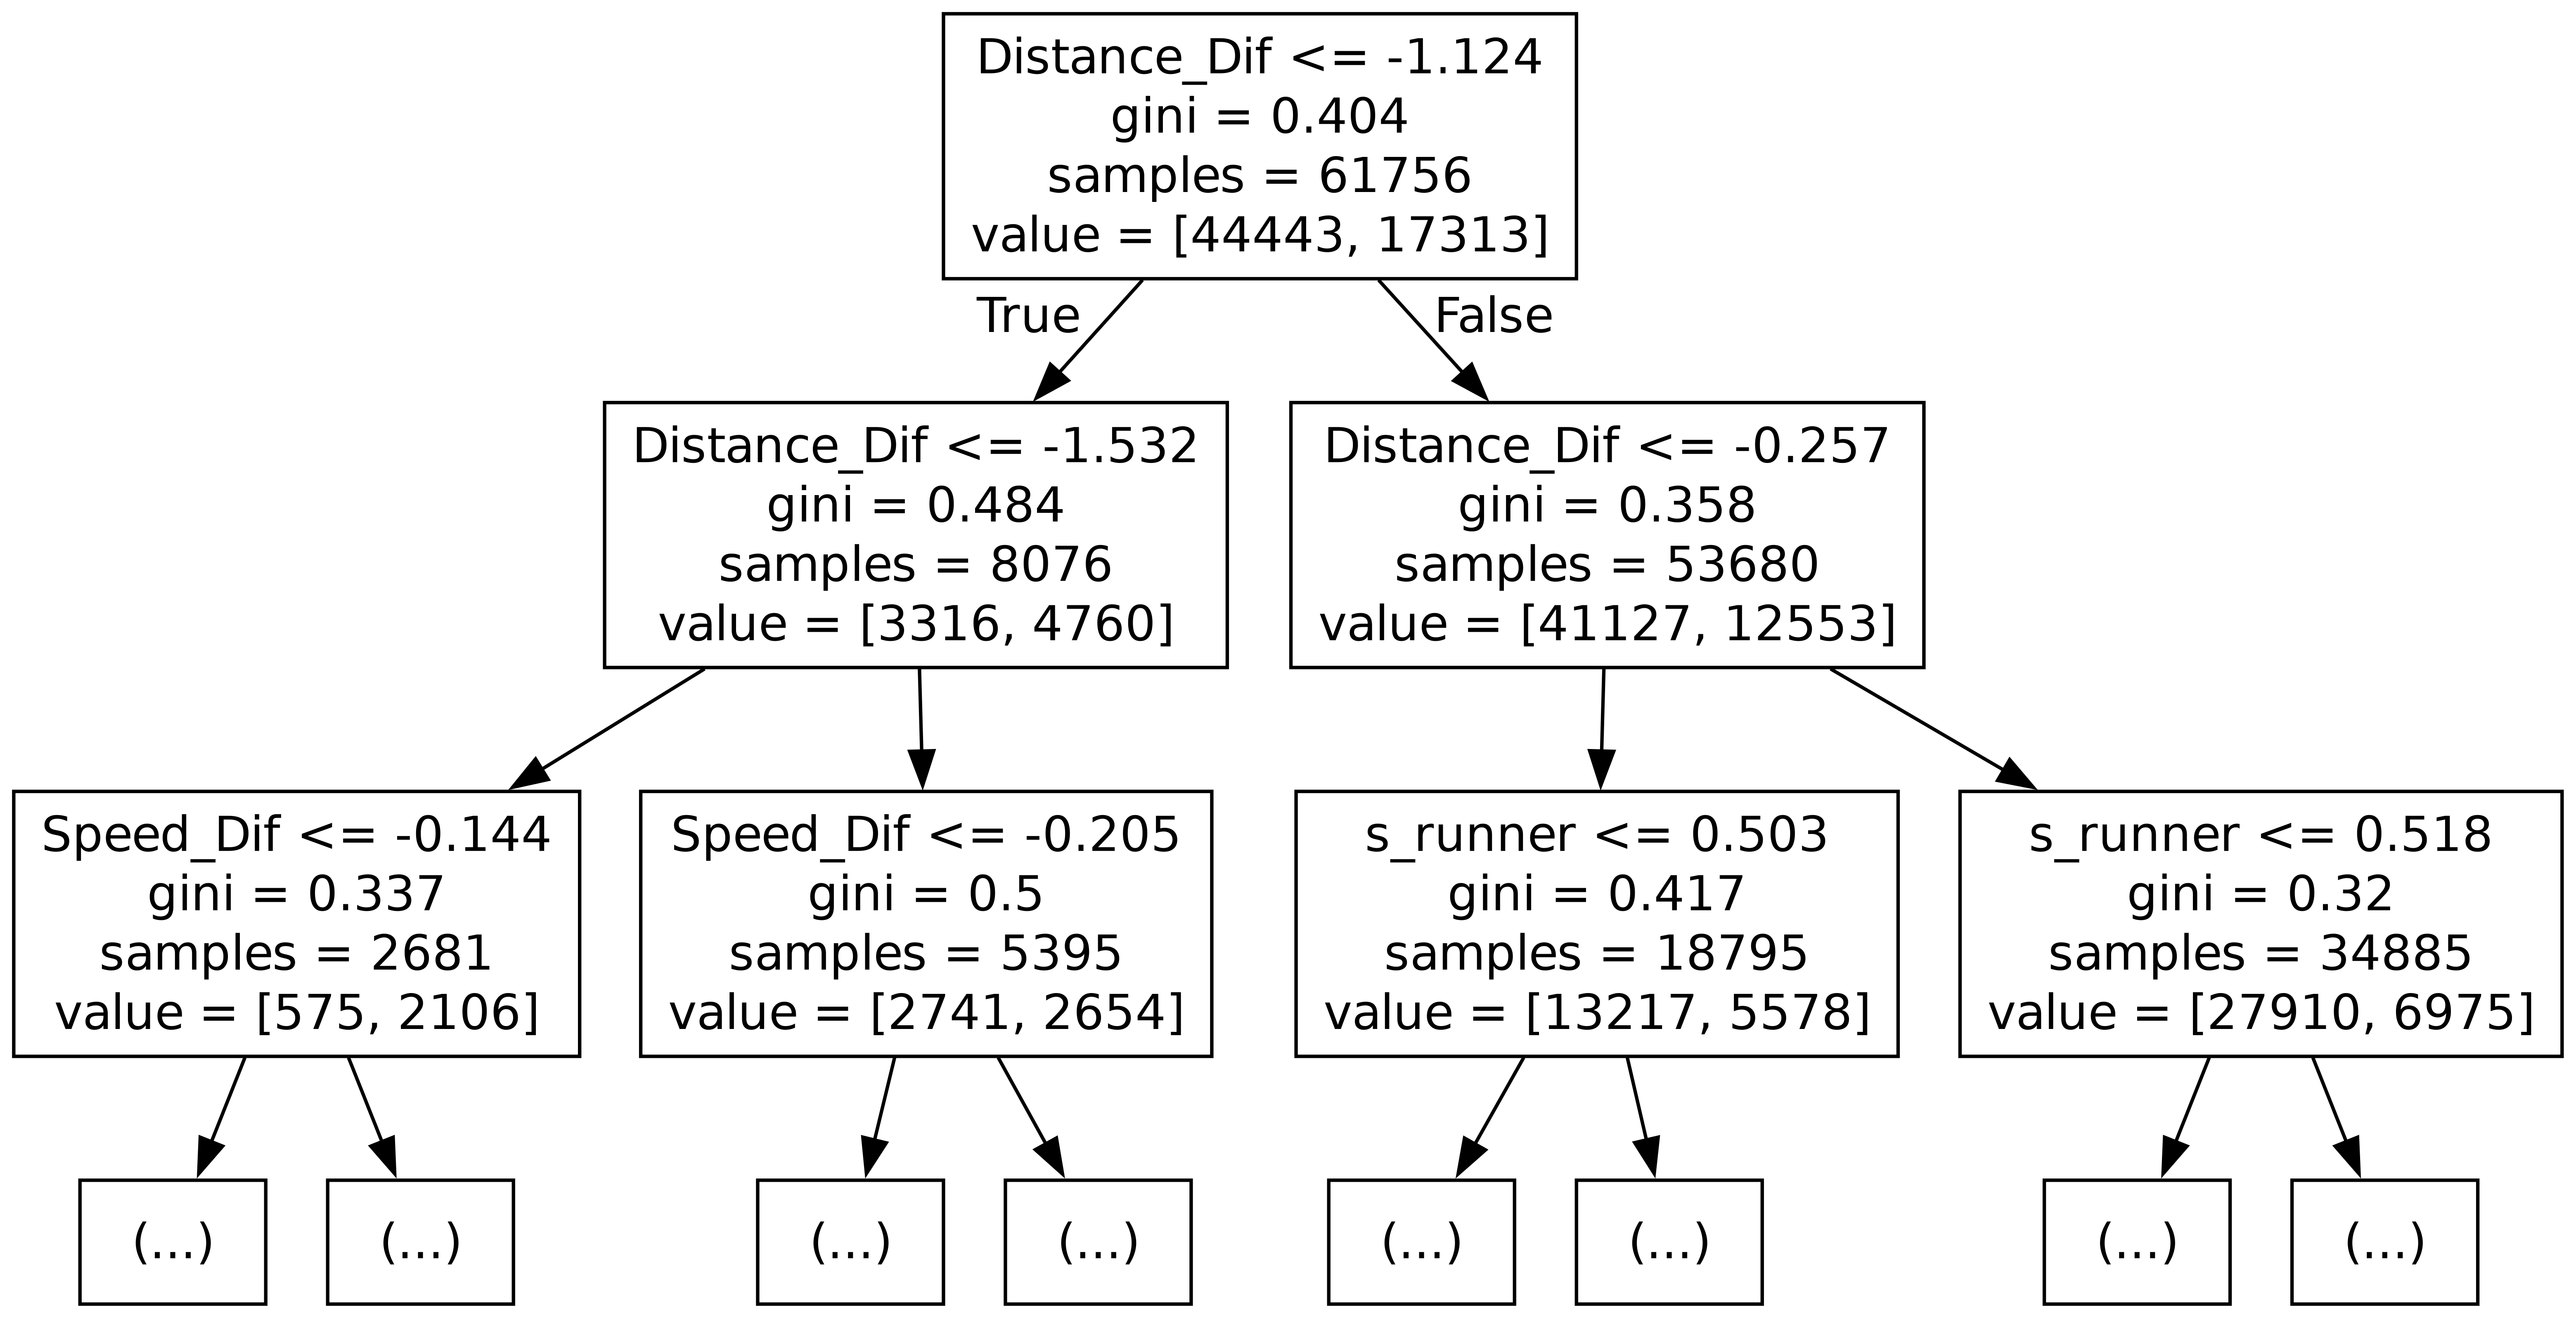

In [53]:
from IPython.display import Image
Image(filename = 'BestForest.png')

In [54]:
#Example of an output


output = best_forest.predict_proba(X_test.reshape(-1,28))[0][1]*100
print('The tackle probability of this player is % .2f' % output, '%')

The tackle probability of this player is  14.19 %
